<a href="https://colab.research.google.com/github/viniciusbeckerdesouza/situacao_mananciais/blob/main/mananciais_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/viniciusbeckerdesouza/situacao_mananciais/main/mananciais.csv', sep=';', decimal=',')
df.head()

,data,sistema,volume_porcentagem,volume_variacao,volume_operacional,pluviometria_dia,pluviometria_mensal,pluviometria_hist
0,2021-08-30,Cantareira,37.3,-0.1,365.86217,0.2,21.1,33.2
1,2021-08-30,Alto Tietê,44.7,0.1,250.16939,3.8,24.1,36.1
2,2021-08-30,Guarapiranga,49.9,0.7,85.44080,1.0,23.4,40.0
3,2021-08-30,Cotia,58.5,0.0,9.64485,0.4,37.4,37.7
4,2021-08-30,Rio Grande,71.0,0.8,79.68722,3.6,20.4,49.1


In [3]:
por_sistema = df.groupby('sistema').sum().reset_index()
por_sistema

,sistema,volume_porcentagem,volume_variacao,volume_operacional,pluviometria_dia,pluviometria_mensal,pluviometria_hist
0,Alto Tietê,407161.1,-6.1,2.056566e+06,29759.4,479862.7,949841.4
1,Cantareira,362992.9,-9.5,3.445552e+06,30654.8,487984.3,1037061.3
2,Cotia,574813.6,40.6,9.420301e+04,26152.5,408177.9,899837.8
3,Guarapiranga,512853.3,13.9,8.842473e+05,28572.8,443828.6,877245.9
4,Rio Claro,623877.7,-29.1,8.526496e+04,45081.4,719076.2,1437633.8
5,Rio Grande,685955.7,-9.6,7.709759e+05,32619.8,511963.7,1010179.0
6,São Lourenço,88437.5,39.5,7.854845e+04,5255.8,86509.7,184634.9


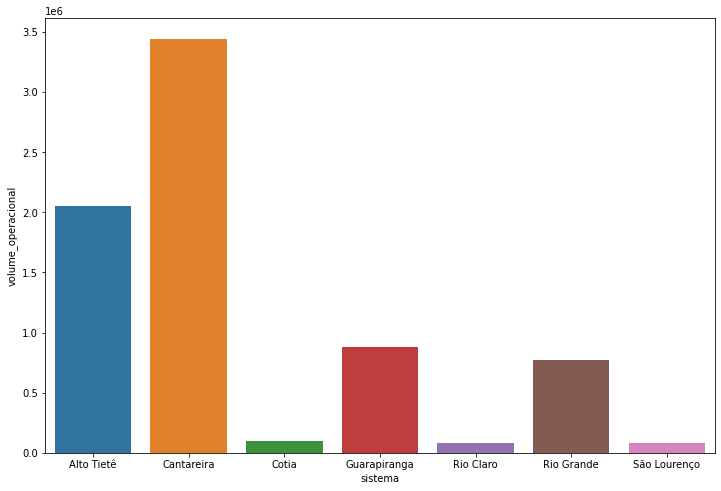

In [4]:
plt.figure(figsize=(12, 8))
sns.barplot(data=por_sistema, x='sistema', y='volume_operacional')
plt.show()

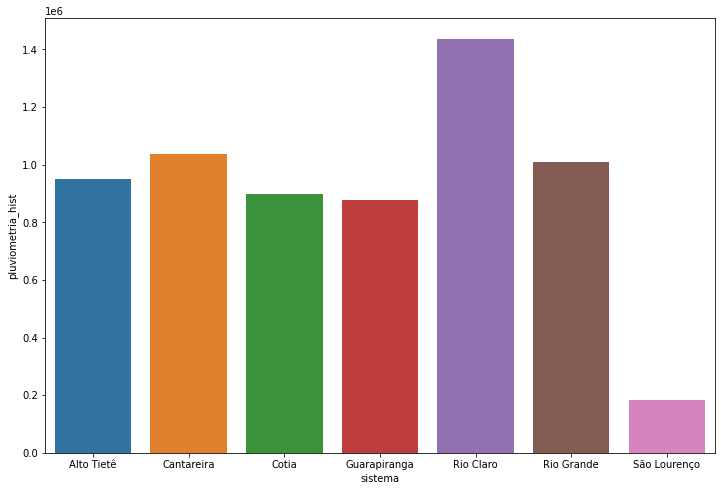

In [5]:
plt.figure(figsize=(12, 8))
sns.barplot(data=por_sistema, x='sistema', y='pluviometria_hist')
plt.show()

In [6]:
df.describe()

,volume_porcentagem,volume_variacao,volume_operacional,pluviometria_dia,pluviometria_mensal,pluviometria_hist
count,48785.000000,48785.000000,48785.000000,48785.000000,48785.000000,48540.000000
mean,66.743708,0.000814,152.000780,4.060603,64.310815,131.776557
std,25.842181,0.581728,187.605825,9.860892,71.156482,68.512564
min,-24.300000,-6.400000,-238.840200,0.000000,0.000000,23.500000
25%,48.200000,-0.200000,13.964260,0.000000,9.700000,73.500000
50%,69.700000,-0.100000,97.370240,0.100000,41.600000,122.400000
75%,89.000000,0.100000,198.582040,2.800000,95.000000,188.800000
max,110.500000,16.600000,987.050160,222.500000,557.600000,298.900000


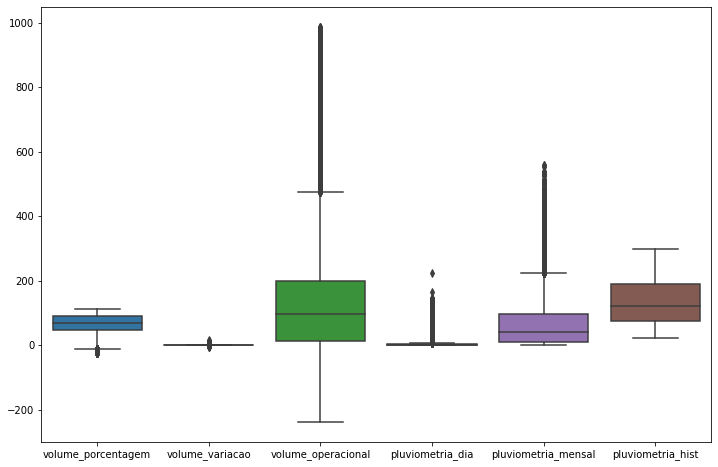

In [7]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.show()

In [8]:
df.shape

(48785, 8)

In [9]:
df['data'] = pd.to_datetime(df['data'])

In [10]:
por_mes = df.groupby(df['data'].dt.month).mean().reset_index()
por_mes

,data,volume_porcentagem,volume_variacao,volume_operacional,pluviometria_dia,pluviometria_mensal,pluviometria_hist
0,1,63.554313,0.243632,141.453143,8.248411,136.146213,248.808889
1,2,69.849727,0.197399,158.156229,6.708088,99.368088,206.916619
2,3,74.501328,0.123197,171.742335,5.724905,96.409891,182.155147
3,4,76.406005,-0.001691,177.873871,3.035686,51.315784,107.275735
4,5,75.274360,-0.062215,173.792131,2.265702,34.374905,84.894853
5,6,73.230343,-0.081740,169.010464,1.992941,35.734412,64.645926
6,7,69.646134,-0.127585,160.577610,1.948601,28.718145,55.418519
7,8,65.179615,-0.174602,149.634898,1.428986,21.751960,51.344297
8,9,60.740258,-0.152946,139.381665,2.505349,40.503592,99.588976
9,10,57.013703,-0.080370,128.735522,3.867892,59.024781,133.311024


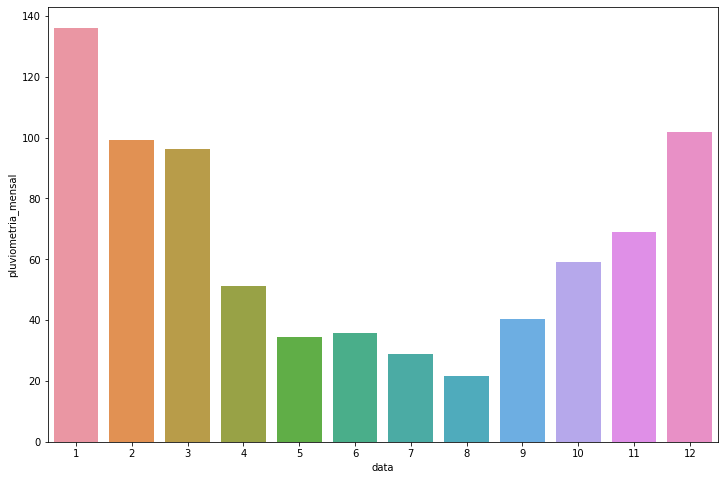

In [11]:
plt.figure(figsize=(12, 8))
sns.barplot(data=por_mes, x='data', y='pluviometria_mensal')
plt.show()

In [14]:
df.corr().style.background_gradient('GnBu')

,volume_porcentagem,volume_variacao,volume_operacional,pluviometria_dia,pluviometria_mensal,pluviometria_hist
volume_porcentagem,1.000000,0.008276,-0.053196,0.008222,0.076414,-0.013757
volume_variacao,0.008276,1.000000,0.000617,0.586705,0.268999,0.199614
volume_operacional,-0.053196,0.000617,1.000000,-0.024942,-0.028680,-0.106356
pluviometria_dia,0.008222,0.586705,-0.024942,1.000000,0.268354,0.230472
pluviometria_mensal,0.076414,0.268999,-0.028680,0.268354,1.000000,0.514377
pluviometria_hist,-0.013757,0.199614,-0.106356,0.230472,0.514377,1.000000


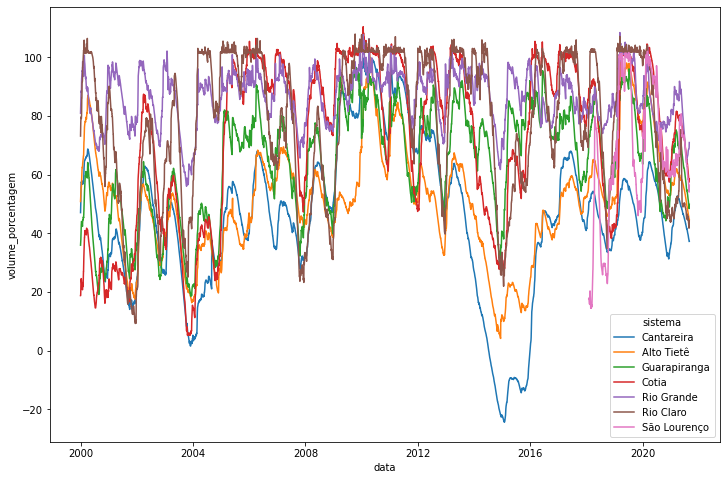

In [17]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='data', y='volume_porcentagem', hue='sistema')
plt.show()

<Figure size 864x576 with 0 Axes>

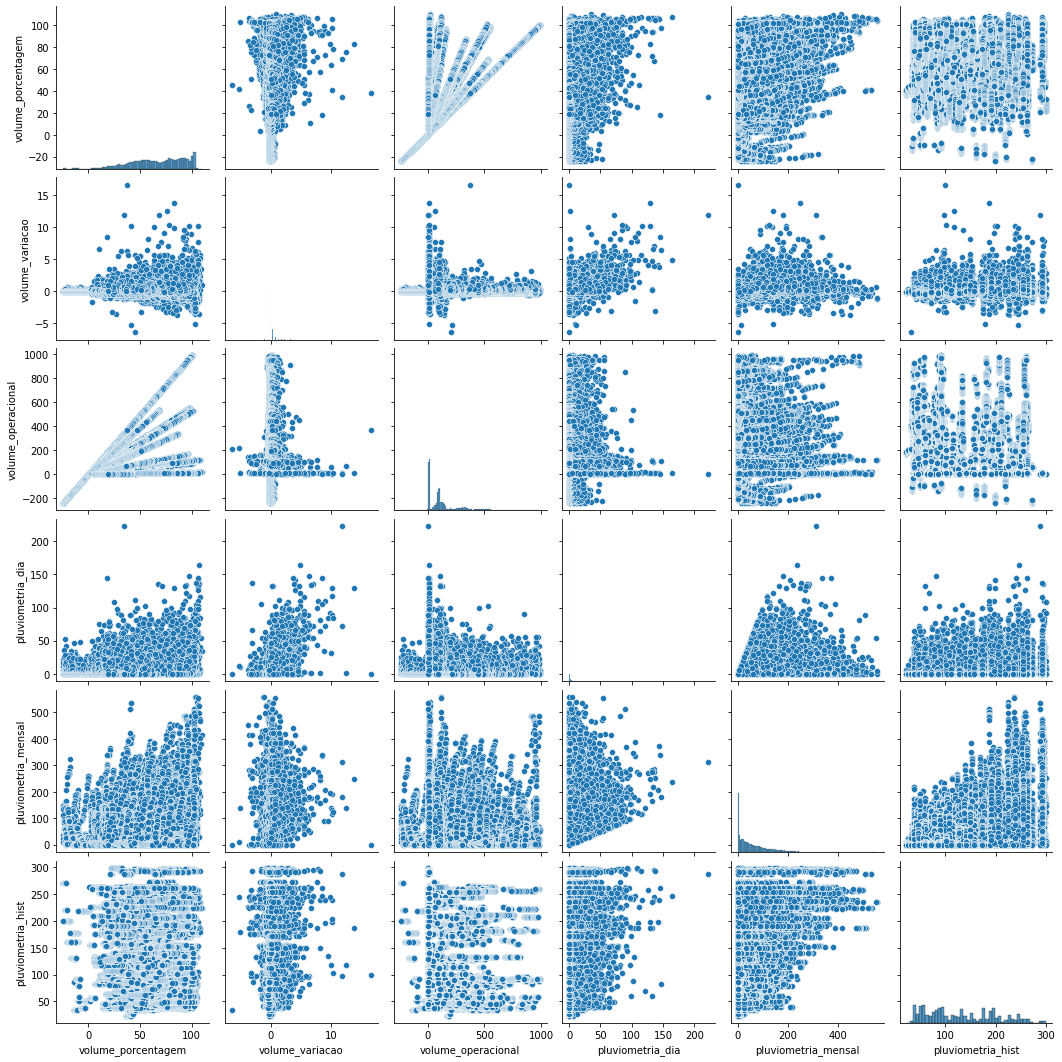

In [23]:
plt.figure(figsize=(12, 8))
sns.pairplot(data=df[['volume_porcentagem',	'volume_variacao',	'volume_operacional',	'pluviometria_dia',	'pluviometria_mensal',	'pluviometria_hist']])
plt.show()

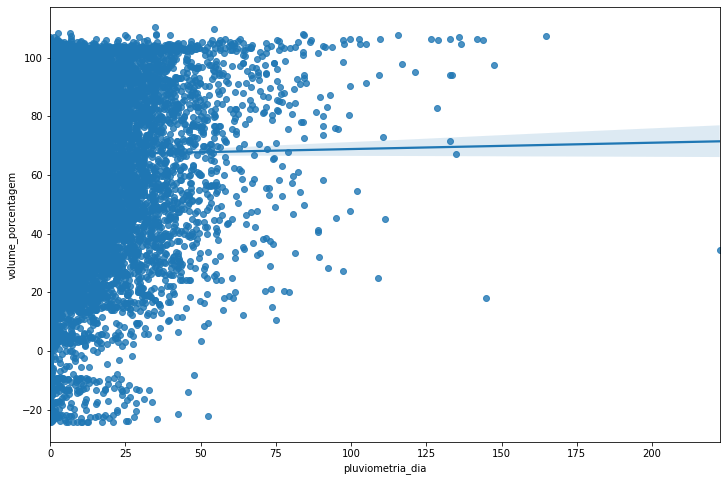

In [24]:
plt.figure(figsize=(12, 8))
sns.regplot(data=df, x='pluviometria_dia', y='volume_porcentagem')
plt.show()

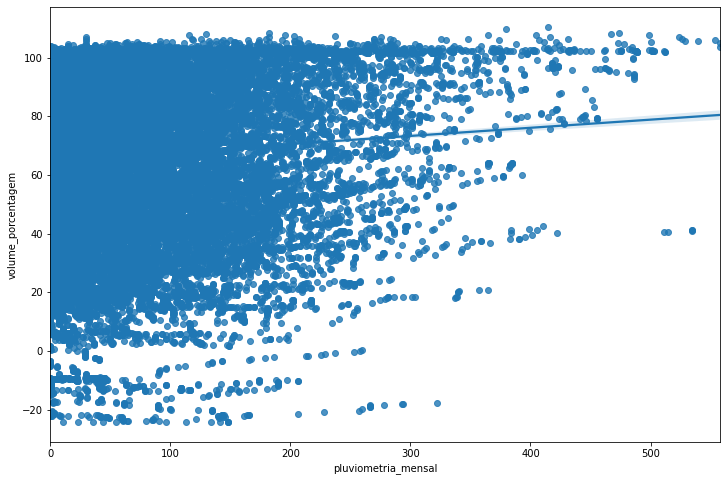

In [25]:
plt.figure(figsize=(12, 8))
sns.regplot(data=df, x='pluviometria_mensal', y='volume_porcentagem')
plt.show()

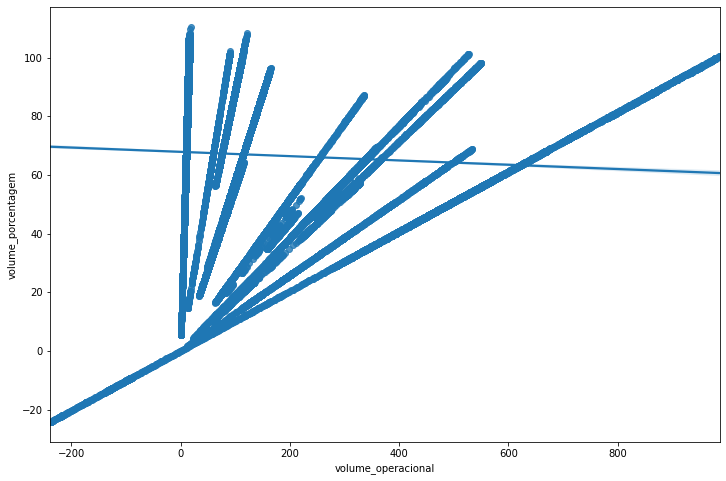

In [26]:
plt.figure(figsize=(12, 8))
sns.regplot(data=df, x='volume_operacional', y='volume_porcentagem')
plt.show()

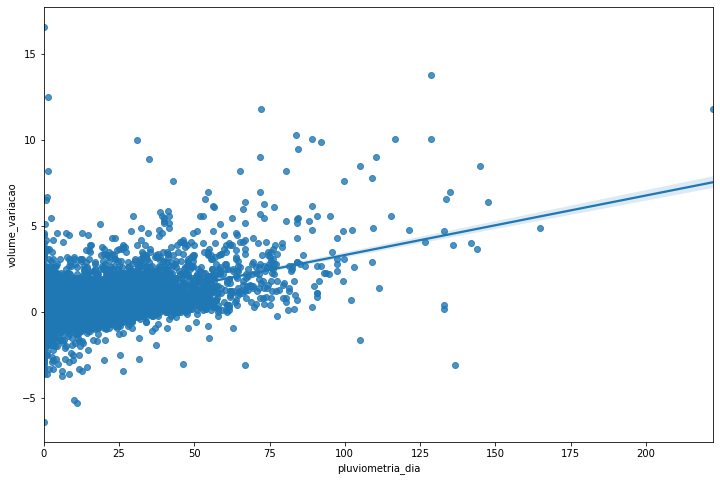

In [27]:
plt.figure(figsize=(12, 8))
sns.regplot(data=df, x='pluviometria_dia', y='volume_variacao')
plt.show()

In [63]:
df_dummies = pd.get_dummies(df)
df_dummies["target"] = df_dummies["volume_porcentagem"] < 42.2
df_dummies = df_dummies.dropna()
df_dummies.head()

,data,volume_porcentagem,volume_variacao,volume_operacional,pluviometria_dia,pluviometria_mensal,pluviometria_hist,sistema_Alto Tietê,sistema_Cantareira,sistema_Cotia,sistema_Guarapiranga,sistema_Rio Claro,sistema_Rio Grande,sistema_São Lourenço,target
0,2021-08-30,37.3,-0.1,365.86217,0.2,21.1,33.2,0,1,0,0,0,0,0,True
1,2021-08-30,44.7,0.1,250.16939,3.8,24.1,36.1,1,0,0,0,0,0,0,False
2,2021-08-30,49.9,0.7,85.44080,1.0,23.4,40.0,0,0,0,1,0,0,0,False
3,2021-08-30,58.5,0.0,9.64485,0.4,37.4,37.7,0,0,1,0,0,0,0,False
4,2021-08-30,71.0,0.8,79.68722,3.6,20.4,49.1,0,0,0,0,0,1,0,False


In [64]:
X = df_dummies.drop(columns=['data','volume_porcentagem','target']).values
y = df_dummies['target'].values.astype('int')

In [65]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
model.score(X, y)

0.9283889575607747

In [68]:
df_dummies.head()
df_tree = df_dummies.drop(columns=['data', 'volume_porcentagem', 'target'])

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

model = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [70]:
model.score(X_test, y_test)

0.9977750309023485

In [71]:
y_pred = model.predict(X_test)

In [72]:
precision_score(y_test, y_pred)

0.9913871260199456

In [73]:
recall_score(y_test, y_pred)

0.9963553530751709

In [74]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image

In [75]:
dt = DecisionTreeClassifier()
dt.fit(X, y)

dot_file = export_graphviz(dt, feature_names=df_tree.columns)
graph = graphviz.Source(dot_file)
graph.render(filename='tree', format='png', cleanup=True)

'tree.png'